<a href="https://colab.research.google.com/github/ammardaffa/Data-Mining-1/blob/main/StudyCase1_DatMin_Kelompok_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grup C - Data Mining - 23 September 2022

In [121]:
# Mengimport modul - modul yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [122]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')    
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

# Preprocessing

## 1. Data Jakarta

In [123]:
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   121 non-null    object 
 1   LT           121 non-null    float64
 2   LB           121 non-null    float64
 3   KT           121 non-null    float64
 4   KM           121 non-null    float64
 5   garasi       44 non-null     float64
 6   carport      90 non-null     float64
 7   lokasi       121 non-null    object 
 8   sertifikat   119 non-null    object 
 9   listrik      120 non-null    float64
 10  hadap        36 non-null     object 
 11  harga        121 non-null    float64
 12  URL          121 non-null    object 
 13  deskripsi    112 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

In [125]:
dfJ = dfJ.dropna(axis=1, how='all')

In [126]:
dfJ = dfJ.drop_duplicates(subset='URL', keep="first")
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...
120,06-12-2021,144.0,250.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM,3500.0,Timur,2.250000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Modern Minimalis dengan 2 lantai di Jati...


In [127]:
dfJ['created_at'] = pd.to_datetime(dfJ['created_at'])

In [128]:
dfJ =  dfJ.drop(121)

In [129]:
dfJ['created_at'] = pd.to_datetime(dfJ['created_at'])
dfJ['sertifikat'] = dfJ['sertifikat'].astype('category')

In [130]:
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 120
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  120 non-null    datetime64[ns]
 1   LT          120 non-null    float64       
 2   LB          120 non-null    float64       
 3   KT          120 non-null    float64       
 4   KM          120 non-null    float64       
 5   garasi      43 non-null     float64       
 6   carport     89 non-null     float64       
 7   lokasi      120 non-null    object        
 8   sertifikat  118 non-null    category      
 9   listrik     119 non-null    float64       
 10  hadap       35 non-null     object        
 11  harga       120 non-null    float64       
 12  URL         120 non-null    object        
 13  deskripsi   111 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(8), object(4)
memory usage: 13.6+ KB


In [131]:
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-06-12,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,2021-02-12,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,2021-06-12,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,2021-06-12,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,2021-06-12,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2021-11-22,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,2021-06-12,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,2021-06-12,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,2021-06-12,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


## 2. Data Depok

In [132]:
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   119 non-null    object 
 1   LT           120 non-null    object 
 2   LB           118 non-null    float64
 3   KT           118 non-null    float64
 4   KM           118 non-null    float64
 5   garasi       25 non-null     float64
 6   carport      94 non-null     float64
 7   lokasi       118 non-null    object 
 8   sertifikat   118 non-null    object 
 9   listrik      103 non-null    float64
 10  hadap        62 non-null     object 
 11  harga        118 non-null    float64
 12  URL          118 non-null    object 
 13  deskripsi    118 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [134]:
dfD.dropna(axis=1, how='all', inplace=True)
dfD.dropna(axis=0, how='all', inplace=True)
dfD.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,NaN,1750.0,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
120,NOTE:,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,-harga yang kami gunakan adalah per satuan juta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
dfD.drop([120,121],axis=0, inplace=True)
dfD.drop_duplicates(subset='URL',inplace=True)

In [136]:
dfD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  118 non-null    object 
 1   LT          118 non-null    object 
 2   LB          118 non-null    float64
 3   KT          118 non-null    float64
 4   KM          118 non-null    float64
 5   garasi      25 non-null     float64
 6   carport     94 non-null     float64
 7   lokasi      118 non-null    object 
 8   sertifikat  118 non-null    object 
 9   listrik     103 non-null    float64
 10  hadap       62 non-null     object 
 11  harga       118 non-null    float64
 12  URL         118 non-null    object 
 13  deskripsi   118 non-null    object 
dtypes: float64(7), object(7)
memory usage: 13.8+ KB


In [137]:
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,4-12-2021,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,NaN,NaN,750.0,https://www.rumah123.com/properti/depok/hos928...,Rumah di Depok Timur
114,4-12-2021,72,45.0,2.0,1.0,NaN,1.0,Cimanggis,SHM,NaN,NaN,1000.0,https://www.rumah123.com/properti/depok/hos928...,PERUMAHAN NUANSA PERMAI DEPOK
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...


In [138]:
dfD.isnull().sum().sort_values(ascending=False)

garasi        93
hadap         56
carport       24
listrik       15
created_at     0
LT             0
LB             0
KT             0
KM             0
lokasi         0
sertifikat     0
harga          0
URL            0
deskripsi      0
dtype: int64

In [139]:
dfD['created_at'] = pd.to_datetime(dfD['created_at'])
dfD['sertifikat'] = dfD['sertifikat'].astype('category')
dfD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  118 non-null    datetime64[ns]
 1   LT          118 non-null    object        
 2   LB          118 non-null    float64       
 3   KT          118 non-null    float64       
 4   KM          118 non-null    float64       
 5   garasi      25 non-null     float64       
 6   carport     94 non-null     float64       
 7   lokasi      118 non-null    object        
 8   sertifikat  118 non-null    category      
 9   listrik     103 non-null    float64       
 10  hadap       62 non-null     object        
 11  harga       118 non-null    float64       
 12  URL         118 non-null    object        
 13  deskripsi   118 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(7), object(5)
memory usage: 13.1+ KB


In [140]:
dfD.describe()

,LB,KT,KM,garasi,carport,listrik,harga
count,118.000000,118.000000,118.000000,25.000000,94.000000,103.000000,118.000000
mean,92.618644,2.737288,1.940678,1.760000,1.670213,2147.572816,1194.440678
std,92.630404,1.024720,0.980950,1.392839,1.061428,1166.261386,1474.387409
min,15.000000,2.000000,1.000000,1.000000,1.000000,900.000000,41.000000
25%,46.000000,2.000000,1.000000,1.000000,1.000000,1300.000000,485.000000
50%,61.000000,3.000000,2.000000,1.000000,1.000000,2200.000000,810.000000
75%,102.250000,3.000000,2.000000,2.000000,2.000000,2200.000000,1137.500000
max,600.000000,7.000000,5.000000,6.000000,7.000000,10000.000000,9000.000000


## 3. Data Bogor

In [141]:
try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')  
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
dfB.shape

(999, 26)

In [142]:
dfB.sample(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,03-12-2021,66.0,60.0,2.0,1.0,0.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,07-12-2021,66.0,37.0,2.0,1.0,0.0,1.0,Ciseeng,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,07-12-2021,70.0,40.0,2.0,1.0,0.0,2.0,Cibinong,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,06-12-2021,162.0,164.0,5.0,5.0,0.0,2.0,Gunung Putri,SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   193 non-null    object 
 1   LT           193 non-null    float64
 2   LB           193 non-null    float64
 3   KT           193 non-null    float64
 4   KM           193 non-null    float64
 5   garasi       193 non-null    float64
 6   carport      193 non-null    float64
 7   lokasi       193 non-null    object 
 8   sertifikat   193 non-null    object 
 9   listrik      193 non-null    float64
 10  hadap        19 non-null     object 
 11  harga        193 non-null    float64
 12  URL          193 non-null    object 
 13  deskripsi    193 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [144]:
dfB1 = dfB.dropna(axis=1, how='all')
dfB1 = dfB1.dropna(axis=0, how='all')

In [145]:
dfB1.sample(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
79,07-12-2021,98.0,49.0,2.0,1.0,0.0,1.0,Bogor Utara,SHM,1300.0,NaN,9.250450e+08,https://www.rumah.com/listing-properti/dijual-...,"Keamanan 24 jam, dekat dengan Tol Babakan Mada..."
98,02-12-2021,72.0,65.0,2.0,2.0,0.0,1.0,Jonggol,SHGB,1300.0,NaN,2.950000e+08,https://www.rumah123.com/properti/bogor/hos927...,"Lokasi strategis, Fasilitas lengkap"
6,06-12-2021,125.0,125.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,NaN,1.946600e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
9,06-12-2021,60.0,30.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,NaN,5.000000e+08,https://www.rumah123.com/properti/bogor/hos894...,Rumah cantik dengan konsep villa dan dengan nu...
119,01-12-2021,98.0,38.0,2.0,1.0,0.0,1.0,Tanah Sareal,SHM,1300.0,NaN,5.250960e+08,https://www.rumah.com/listing-properti/dijual-...,- 5 Menit Ke Pintu tol Caringin\n- 7 Menit Ke ...
159,05-12-2021,131.0,90.0,2.0,2.0,0.0,1.0,Babakan Madang,Lainnya,2200.0,NaN,1.150000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni di Cluster Favorit Babakan Madang
25,06-12-2021,84.0,36.0,2.0,1.0,0.0,1.0,Parung,SHM,1300.0,NaN,5.990000e+08,https://www.rumah.com/listing-properti/dijual-...,Perumahan cluster baru di jalur utama Bogor de...
55,07-12-2021,72.0,36.0,2.0,1.0,0.0,1.0,Bogor Barat,SHM,1300.0,NaN,3.500000e+08,https://www.rumah.com/listing-properti/dijual-...,"Keamanan 24 jam, area bermain, trek lari, lapa..."
150,04-12-2021,195.0,100.0,2.0,2.0,0.0,2.0,Bogor Barat,SHM,2200.0,NaN,1.750000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni bukit cimanggu city bogor
155,05-12-2021,60.0,30.0,2.0,1.0,0.0,1.0,Ranca Bungur,SHGB,1300.0,NaN,1.680000e+08,https://www.rumah.com/listing-properti/dijual-...,Perumahan disubsidi pemerintah mudah murah fla...


In [146]:
dfB1['created_at'] = pd.to_datetime(dfB1['created_at'])

In [147]:
dfB1.isnull().sum().sort_values(ascending=False) 

hadap         174
created_at      0
LT              0
LB              0
KT              0
KM              0
garasi          0
carport         0
lokasi          0
sertifikat      0
listrik         0
harga           0
URL             0
deskripsi       0
dtype: int64

In [148]:
dfB2 = dfB1.drop(labels='hadap', axis=1)

In [149]:
dfB2.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02
mean,143.575130,98.663212,2.694301,1.797927,0.155440,1.310881,2076.165803,1.289362e+09
std,191.576208,125.851746,1.110939,1.175087,0.485931,0.905271,1562.633932,2.115854e+09
min,30.000000,21.000000,1.000000,1.000000,0.000000,0.000000,900.000000,6.500000e+07
25%,66.000000,36.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,3.990000e+08
50%,84.000000,58.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,6.700000e+08
75%,120.000000,90.000000,3.000000,2.000000,0.000000,1.000000,2200.000000,1.250000e+09
max,1500.000000,1200.000000,8.000000,6.000000,3.000000,8.000000,17600.000000,1.650000e+10


In [150]:
dfB2.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LT                84.0
LB                58.0
KT                 2.0
KM                 1.0
garasi             0.0
carport            1.0
listrik         1300.0
harga      670000000.0
dtype: float64

LT             AxesSubplot(0.125,0.71587;0.168478x0.16413)
LB          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
KT          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
KM          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
garasi        AxesSubplot(0.125,0.518913;0.168478x0.16413)
carport    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
listrik    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
harga      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

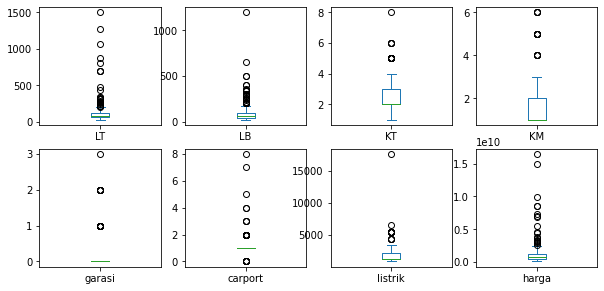

In [151]:
dfB2.plot(kind="box", subplots=True, layout=(4,4), figsize=(10,10)) #Mengecek data outliers

## 4. Data Tangerang

In [152]:
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   124 non-null    object 
 1   LT           124 non-null    float64
 2   LB           124 non-null    float64
 3   KT           124 non-null    float64
 4   KM           124 non-null    float64
 5   garasi       38 non-null     float64
 6   carport      92 non-null     float64
 7   lokasi       124 non-null    object 
 8   sertifikat   122 non-null    object 
 9   listrik      111 non-null    float64
 10  hadap        49 non-null     object 
 11  harga        124 non-null    float64
 12  URL          124 non-null    object 
 13  deskripsi    124 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [154]:
dfT.dropna(how='all', inplace = True)
dfT.dropna(axis=1, how='all', inplace=True)
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


In [155]:
dfT.isnull().sum().sort_values(ascending=False)

garasi        86
hadap         75
carport       32
listrik       13
sertifikat     2
created_at     0
LT             0
LB             0
KT             0
KM             0
lokasi         0
harga          0
URL            0
deskripsi      0
dtype: int64

In [156]:
dfT.dtypes

created_at     object
LT            float64
LB            float64
KT            float64
KM            float64
garasi        float64
carport       float64
lokasi         object
sertifikat     object
listrik       float64
hadap          object
harga         float64
URL            object
deskripsi      object
dtype: object

In [157]:
dfT['created_at'] = pd.to_datetime(dfT['created_at'])
dfT['sertifikat'] = dfT['sertifikat'].astype('category')
dfT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  124 non-null    datetime64[ns]
 1   LT          124 non-null    float64       
 2   LB          124 non-null    float64       
 3   KT          124 non-null    float64       
 4   KM          124 non-null    float64       
 5   garasi      38 non-null     float64       
 6   carport     92 non-null     float64       
 7   lokasi      124 non-null    object        
 8   sertifikat  122 non-null    category      
 9   listrik     111 non-null    float64       
 10  hadap       49 non-null     object        
 11  harga       124 non-null    float64       
 12  URL         124 non-null    object        
 13  deskripsi   124 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(8), object(4)
memory usage: 13.8+ KB


In [158]:
dfT.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,124.000000,124.000000,124.000000,124.000000,38.000000,92.000000,111.000000,124.000000
mean,202.653226,199.491935,3.346774,2.693548,2.210526,1.608696,3962.162162,3849.556452
std,285.219301,264.097681,1.097257,1.295253,1.862255,1.222109,6757.743761,9316.413817
min,37.000000,27.000000,2.000000,1.000000,1.000000,1.000000,1300.000000,95.000000
25%,90.000000,81.500000,3.000000,2.000000,1.000000,1.000000,2200.000000,1037.500000
50%,150.500000,125.000000,3.000000,2.000000,2.000000,1.000000,2200.000000,1950.000000
75%,250.000000,240.000000,4.000000,3.000000,2.000000,2.000000,3500.000000,3775.000000
max,3087.000000,2500.000000,8.000000,8.000000,10.000000,10.000000,66000.000000,100000.000000


## 5 Data Bekasi

In [159]:
dfX

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   107 non-null    object 
 1   LT           107 non-null    float64
 2   LB           107 non-null    float64
 3   KT           107 non-null    float64
 4   KM           106 non-null    float64
 5   garasi       33 non-null     float64
 6   carport      81 non-null     float64
 7   lokasi       107 non-null    object 
 8   sertifikat   106 non-null    object 
 9   listrik      101 non-null    float64
 10  hadap        48 non-null     object 
 11  harga        107 non-null    float64
 12  URL          107 non-null    object 
 13  deskripsi    107 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [161]:
dfX.dropna(axis=1, how='all', inplace=True)
dfX.dropna(axis=0, how='all', inplace=True)
dfX.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
102,01-12-2021,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."
106,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,RCG/20/V/010 MP/LB/THM/010 Di jual Rumah Lelan...


In [162]:
dfX.drop_duplicates(subset='URL',inplace=True)

In [163]:
dfX.isnull().sum().sort_values(ascending=False)

garasi        72
hadap         58
carport       25
listrik        6
KM             1
sertifikat     1
created_at     0
LT             0
LB             0
KT             0
lokasi         0
harga          0
URL            0
deskripsi      0
dtype: int64

In [164]:
dfX['created_at'] = pd.to_datetime(dfX['created_at'])
dfX['sertifikat'] = dfX['sertifikat'].astype('category')
dfX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 105
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  104 non-null    datetime64[ns]
 1   LT          104 non-null    float64       
 2   LB          104 non-null    float64       
 3   KT          104 non-null    float64       
 4   KM          103 non-null    float64       
 5   garasi      32 non-null     float64       
 6   carport     79 non-null     float64       
 7   lokasi      104 non-null    object        
 8   sertifikat  103 non-null    category      
 9   listrik     98 non-null     float64       
 10  hadap       46 non-null     object        
 11  harga       104 non-null    float64       
 12  URL         104 non-null    object        
 13  deskripsi   104 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(8), object(4)
memory usage: 11.6+ KB


In [165]:
dfX.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,104.000000,104.000000,104.000000,103.000000,32.000000,79.000000,98.000000,1.040000e+02
mean,108.653846,109.278846,2.951923,1.932039,1.093750,1.088608,2061.224490,1.067847e+09
std,59.098038,71.037725,1.027579,0.843221,0.296145,0.285992,981.229258,7.477467e+08
min,36.000000,30.000000,1.000000,1.000000,1.000000,1.000000,900.000000,1.600000e+08
25%,72.000000,60.000000,2.000000,1.000000,1.000000,1.000000,1300.000000,5.832500e+08
50%,92.500000,90.000000,3.000000,2.000000,1.000000,1.000000,2200.000000,9.100000e+08
75%,128.250000,143.250000,3.250000,2.000000,1.000000,1.000000,2200.000000,1.350000e+09
max,364.000000,494.000000,7.000000,4.000000,2.000000,2.000000,5500.000000,4.500000e+09


In [166]:
dfJ['daerah'] = 'Jakarta'
dfD['daerah'] = 'Depok'
dfB2['daerah'] = 'Bogor'
dfT['daerah'] = 'Tangerang'
dfX['daerah'] = 'Bekasi'

In [167]:
df = pd.concat([dfJ, dfD, dfB2, dfT, dfX], axis = 0)
df

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,daerah
0,2021-06-12,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta
1,2021-02-12,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta
2,2021-06-12,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
3,2021-06-12,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta
4,2021-06-12,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2021-01-12,108.0,47.0,2.0,1.0,NaN,1.0,Kota Bekasi,SHM,1300.0,NaN,1.000000e+09,https://www.rumah123.com/properti/bekasi/hos92...,"Rumah siap,di salah satu cluster grand wisata,...",Bekasi
102,2021-01-12,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...,Bekasi
103,2021-01-12,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju...",Bekasi
104,2021-01-12,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ...",Bekasi


In [186]:
df.groupby(['daerah']).describe()

LB                                                              \
           count        mean         std   min    25%    50%     75%     max   
daerah                                                                         
Bekasi     104.0  109.278846   71.037725  30.0  60.00   90.0  143.25   494.0   
Bogor      193.0   98.663212  125.851746  21.0  36.00   58.0   90.00  1200.0   
Depok      118.0   92.618644   92.630404  15.0  46.00   61.0  102.25   600.0   
Jakarta    120.0  280.158333  286.378283  21.0  95.25  200.0  362.50  2000.0   
Tangerang  124.0  199.491935  264.097681  27.0  81.50  125.0  240.00  2500.0   

              KT            ... listrik           harga                \
           count      mean  ...     75%      max  count          mean   
daerah                      ...                                         
Bekasi     104.0  2.951923  ...  2200.0   5500.0  104.0  1.067847e+09   
Bogor      193.0  2.694301  ...  2200.0  17600.0  193.0  1.289362e+09   
Depok      118.0  2.737288  ...  2200.0  10000.0  118.0  1.194441e+03   
Jakarta    120.0  4.283333  ...  4450.0  66000.0  120.0  9.045005e+09   
Tangerang  124.0  3.346774  ...  3500.0  66000.0  124.0  3.849556e+03   

                                                                  \
                    std          min           25%           50%   
daerah                                                             
Bekasi     7.477467e+08  160000000.0  5.832500e+08  9.100000e+08   
Bogor      2.115854e+09   65000000.0  3.990000e+08  6.700000e+08   
Depok      1.474387e+03         41.0  4.850000e+02  8.100000e+02   
Jakarta    1.592931e+10  380000000.0  1.575000e+09  3.450000e+09   
Tangerang  9.316414e+03         95.0  1.037500e+03  1.950000e+03   

                                       
                    75%           max  
daerah                                 
Bekasi     1.350000e+09  4.500000e+09  
Bogor      1.250000e+09  1.650000e+10  
Depok      1.137500e+03  9.000000e+03  
Jakarta    7.312500e+09  1.050000e+11  
Tangerang  3.775000e+03  1.000000e+05  

[5 rows x 56 columns]

In [174]:
dfx = np.abs(df.harga - df.harga.mean())<=(2*df.harga.std())
# mu-2s<x<mu+2shar
print(dfx.shape)
dfx.head()

(659,)


0    True
1    True
2    True
3    True
4    True
Name: harga, dtype: bool

In [176]:
df2 = df[dfx]

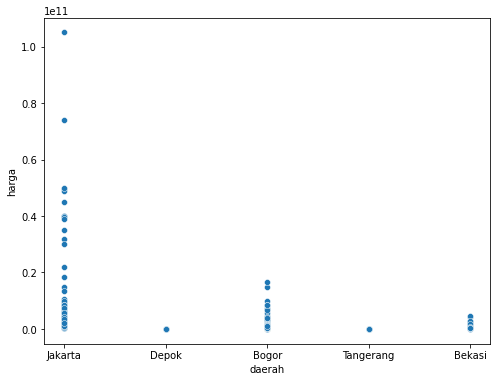

In [171]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.scatterplot(x="daerah",y='harga', data=df)

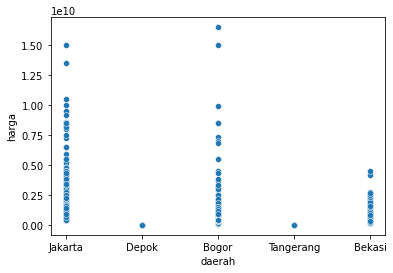

In [179]:
sns.scatterplot(x="daerah", y="harga", data=df2)

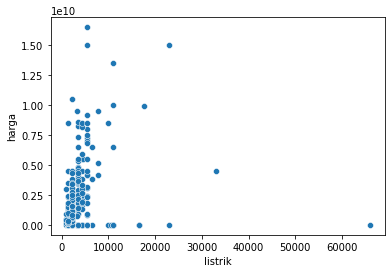

In [182]:
sns.scatterplot(x="listrik", y="harga", data=df2)

In [181]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 0 to 105
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  643 non-null    datetime64[ns]
 1   LT          643 non-null    object        
 2   LB          643 non-null    float64       
 3   KT          643 non-null    float64       
 4   KM          642 non-null    float64       
 5   garasi      322 non-null    float64       
 6   carport     533 non-null    float64       
 7   lokasi      643 non-null    object        
 8   sertifikat  638 non-null    object        
 9   listrik     609 non-null    float64       
 10  hadap       188 non-null    object        
 11  harga       643 non-null    float64       
 12  URL         643 non-null    object        
 13  deskripsi   634 non-null    object        
 14  daerah      643 non-null    object        
dtypes: datetime64[ns](1), float64(7), object(7)
memory usage: 96.5+ KB


In [184]:
df3 = pd.concat([dfD,dfT], axis = 0)
df3

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,daerah
0,2021-06-12,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni,Depok
1,2021-06-12,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam,Depok
2,2021-06-12,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,Depok
3,2021-06-12,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM,Depok
4,2021-06-12,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2021-12-08,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters...",Tangerang
120,2021-12-08,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr...",Tangerang
121,2021-12-08,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,...",Tangerang
122,2021-12-08,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d...",Tangerang


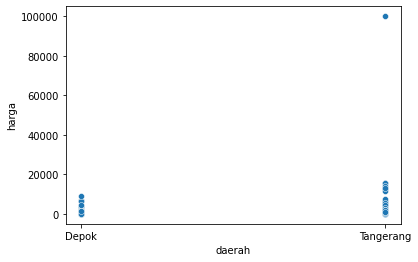

In [185]:
sns.scatterplot(x="daerah", y="harga", data=df3)

In [ ]:
df

Kesimpulan
1.	Kualitas data tidak terlalu bagus, terutama data kota Bogor dan Bekasi. Terlalu banyak nilai null pada kota Bogor, yaitu dari 999 baris menjadi 194 baris dan kota Bekasi, yaitu dari 992 baris menjadi 104 baris.
2.	Jangan masukkan baris dan kolom yang kosong semua atau gunakan, jangan memasukkan note atau tulisan yang tidak berhubungan dengan data di dalam suatu dataset.
3. Harga rumah di Jakarta dan Bogor cenderung mahal, sedangkan harga rumah di Depok dan Tangerang cenderung murah.
4. Jika ingin membuat cabang dengan harga properti yang mahal, maka memilih di Kota Jakarta dan Bogor, dan jika ingin memilih cabang properti dengan jumlah properti paling banyak adalah Kota Bogor.
5. Properti yang berada di Kota Bogor dengan rata-rata jumlah kamar tidur 2 sampai 3 paling dijual dan dengan luas bangunan rata-rata 98 m^2
6. Dengan asumsi harga rumah yang terus naik, maka sebaiknya investor menginvestasikan properti di daerah Depok dan Tangerang, karena harga properti di daerah tersebut cenderung murah.